<a href="https://colab.research.google.com/github/rubanzasilva/ps-s03e02/blob/main/ps_s03e02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 37.9 MB/s eta 0:00:00


In [1]:
from fastai.tabular.all import *
#import sweetviz as sv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/Rubanza/datasets/playground-series-s3e2/

sample_submission.csv  test.csv  train.csv


In [4]:
path = Path('drive/MyDrive/Rubanza/datasets/playground-series-s3e2/')
path

Path('drive/MyDrive/Rubanza/datasets/playground-series-s3e2')

In [5]:
train_df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
sample_df = pd.read_csv(path/'sample_submission.csv')
train_df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [ ]:
report = sv.analyze(train_df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


EDA

In [13]:
train_df.shape

(15304, 12)

Missing Values

In [ ]:
train_df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status           0
stroke                   0
log_avg_glucose_level    0
dtype: int64

Take a look at the dataframe

Dependent variable stroke, where 1 is if the patient had a stroke or 0 if not

In [6]:
dep_classes = train_df.stroke.unique()
dep_classes

array([0, 1])

In [8]:
dep_classes_count = train_df['stroke'].value_counts()
dep_classes_count

0    14672
1      632
Name: stroke, dtype: int64

<Axes: ylabel='stroke'>

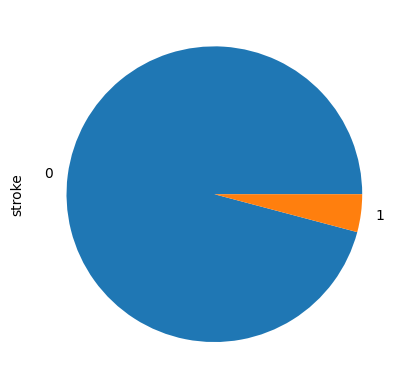

In [11]:
dep_classes_count.plot(kind='pie')

In [12]:
plt.show()

In [9]:
print(dep_classes_count)

0    14672
1      632
Name: stroke, dtype: int64


<Axes: >

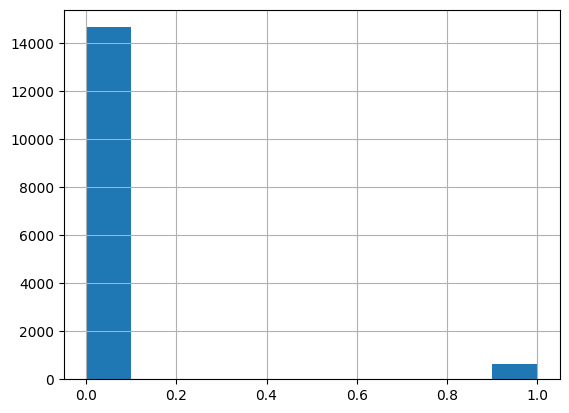

In [10]:
train_df['stroke'].hist()

Numeric variables

In [ ]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


<Axes: >

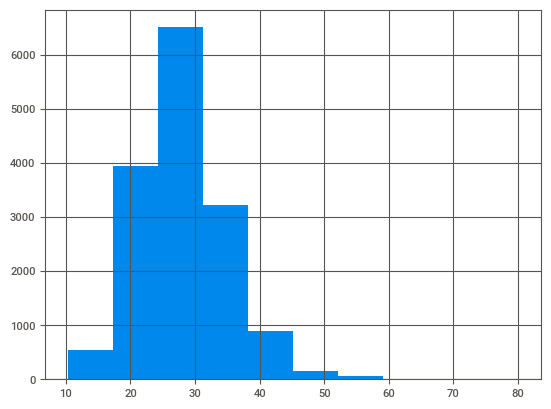

In [ ]:
train_df['bmi'].hist()

<Axes: >

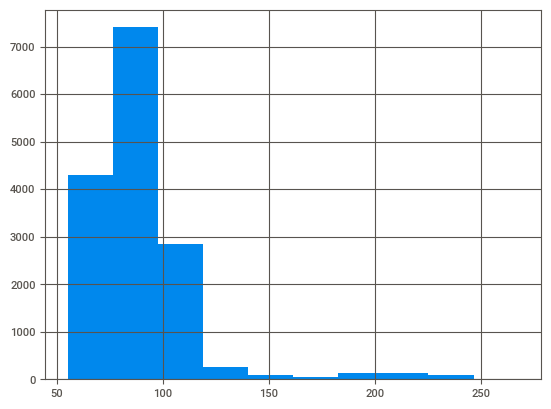

In [ ]:
train_df['avg_glucose_level'].hist()

<Axes: >

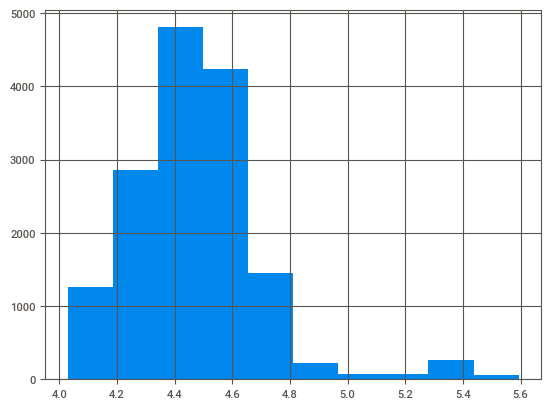

In [ ]:
train_df['log_avg_glucose_level'] = np.log(train_df['avg_glucose_level'] + 1)
train_df['log_avg_glucose_level'].hist()

In [ ]:
train_df.describe(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,15304,15304,15304,15304,15304
unique,3,2,5,2,4
top,Female,Yes,Private,Rural,never smoked
freq,9446,10385,9752,7664,6281


In [ ]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
dls = TabularDataLoaders.from_csv(path/'train.csv', path=path, y_names="stroke",
    cat_names = ['gender','hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status',],
    cont_names = ['id','age','avg_glucose_level', 'bmi', ],
    procs = [Categorify, FillMissing, Normalize])

In [15]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))

In [16]:
to = TabularPandas(train_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['gender','hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','smoking_status',],
    cont_names = ['id','age','avg_glucose_level', 'bmi', ],
                   y_names='stroke',
                   splits=splits)

In [17]:
to.xs.iloc[:2]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,id,age,avg_glucose_level,bmi
8455,1,1,1,2,4,1,3,0.175112,1.003729,-0.263554,0.677966
13969,2,2,1,2,3,2,3,1.420046,0.354041,0.371487,0.332639


In [21]:
to.xs.iloc[:]

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,id,age,avg_glucose_level,bmi
8455,1,1,1,2,4,1,3,0.175112,1.003729,-0.263554,0.677966
13969,2,2,1,2,3,2,3,1.420046,0.354041,0.371487,0.332639
12579,1,1,1,2,3,2,3,1.106216,0.354041,-0.290713,0.858137
11647,1,1,1,2,3,2,3,0.895792,1.003729,0.621510,-0.673313
14733,1,1,1,1,3,1,3,1.592539,-0.434865,-0.302695,0.602895
...,...,...,...,...,...,...,...,...,...,...,...
309,1,1,1,2,3,2,1,-1.664068,0.910916,-1.179372,0.212525
8149,1,1,1,2,4,1,2,0.106024,1.050135,-1.043177,0.152469
13914,1,1,1,1,1,1,3,1.407628,-0.249240,0.096303,-0.252915
6008,2,1,1,2,3,2,1,-0.377365,1.189354,0.358307,-0.177844


Why does to have 11 columns instead of 12 and lack the dependent variable a it was declared in the to

In [22]:
dls = to.dataloaders(bs=64)

In [23]:
dls.show_batch()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,id,age,avg_glucose_level,bmi,stroke
0,Male,0,0,No,children,Rural,Unknown,10980.999967,3.000001,87.769997,17.900000,0.0
1,Female,0,0,Yes,Private,Rural,Unknown,6214.000062,44.000000,85.839996,48.900002,0.0
2,Female,0,0,No,Private,Rural,formerly smoked,7185.000002,34.000000,81.510002,42.099999,0.0
3,Female,0,0,Yes,Private,Urban,never smoked,11832.000006,31.000000,55.320000,39.599999,0.0
4,Female,0,0,No,Private,Urban,Unknown,9372.000004,18.000000,81.870003,27.900000,0.0
5,Male,0,0,Yes,Private,Rural,never smoked,4031.999981,67.000000,97.239998,26.500000,0.0
6,Male,0,0,Yes,Private,Rural,never smoked,6434.999939,42.000000,65.010002,37.000000,0.0
7,Male,0,0,Yes,Self-employed,Urban,never smoked,2029.999853,65.000000,94.629997,23.000000,0.0
8,Female,0,0,Yes,Private,Urban,formerly smoked,8429.000008,72.000000,83.129997,32.700001,0.0
9,Male,0,0,No,Private,Rural,never smoked,4236.000111,27.000000,70.190002,39.000000,0.0


In [24]:
learn = tabular_learner(dls, metrics=accuracy)

SuggestedLRs(slide=0.013182567432522774, valley=0.0010000000474974513)

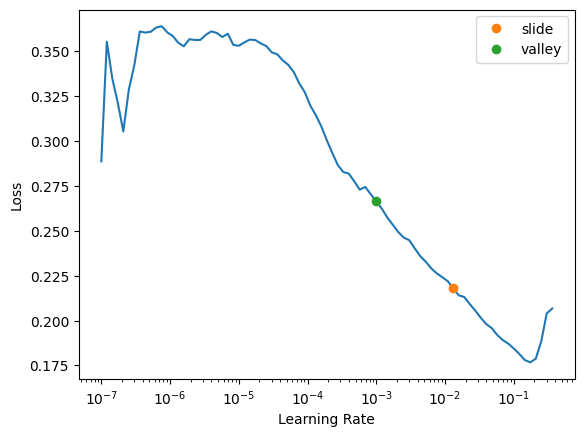

In [25]:
learn.lr_find(suggest_funcs=(slide,valley))

In [26]:
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.055933,0.043241,0.960784,00:04
1,0.043223,0.040141,0.960784,00:02
2,0.046189,0.039645,0.960784,00:02
3,0.041004,0.040024,0.960784,00:02
4,0.039508,0.040729,0.960784,00:02
5,0.037920,0.034749,0.960784,00:03
6,0.039211,0.034246,0.960784,00:02
7,0.035625,0.040201,0.960784,00:02
8,0.037084,0.036459,0.960784,00:02
9,0.034818,0.033789,0.960784,00:02


In [27]:
dl = learn.dls.test_dl(test_df)

In [28]:
preds = learn.get_preds(dl=dl)
preds

(tensor([[ 0.0569],
         [ 0.2216],
         [-0.0018],
         ...,
         [-0.0363],
         [-0.0830],
         [-0.0421]]),
 None)

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle
from google.colab import files
files.upload()


In [32]:

 ! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

# List available datasets.
#!kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [33]:
target_preds = preds[0]

In [34]:
test_df['stroke'] = target_preds

test_df.to_csv('submission.csv', columns=['id','stroke'], index=False)

sub = pd.read_csv('submission.csv')
sub.head()

,id,stroke
0,15304,0.056875
1,15305,0.221600
2,15306,-0.001769
3,15307,0.069043
4,15308,-0.018708


In [35]:
!kaggle competitions submit -c playground-series-s3e2 -f submission.csv -m "fastai baseline"

100% 181k/181k [00:01<00:00, 93.1kB/s]
400 - Bad Request - Submission not allowed:  Submissions have been disabled for this competition.


Notes

preds are negative solve by adding transform bloack , y block , catgeory block for isngle label classi/binary classification.